In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
sf = pd.read_csv("sample_flat.csv")
sf.head()

,names,dates,latitude,longitude,categorical,quant1,quant2,quant3
0,b'Rawad',1.453009e+09,-19.988651,-41.435565,Category01,1.933239,6.052785,6105.123120
1,b'Eurma',1.471779e+09,-8.593256,27.742604,Category00,1.520733,-11.065076,143.902725
2,b'Taleia',1.473613e+09,-67.463164,-109.366796,Category04,1.863466,11.437340,2019.370225
3,b'Niley',1.481194e+09,-7.537010,-32.218540,Category03,0.745431,19.415543,3225.920647
4,b'Acey',1.454403e+09,-17.116866,2.949914,Category05,1.031100,17.714492,4976.099324


In [5]:
sf.describe()

,dates,latitude,longitude,quant1,quant2,quant3
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.467361e+09,1.026321,-0.082380,1.737077,0.031580,4980.333493
std,9.141892e+06,51.545570,103.546299,1.012192,17.456411,2889.413452
min,1.451612e+09,-89.995631,-179.756945,0.001356,-29.979777,0.723583
25%,1.459531e+09,-43.319612,-89.584439,0.854677,-15.223848,2490.176566
50%,1.467432e+09,1.219217,0.070930,1.726674,-0.234758,4920.907779
75%,1.475310e+09,46.321107,88.911360,2.618524,15.397590,7499.437028
max,1.483138e+09,89.974703,179.946696,3.499813,29.994035,9999.376454


In [8]:
sf["dates"].dtype

dtype('float64')

In [11]:
sf["names"].dtype

dtype('O')

Seems that the "names" column is of type object. Let's convert that to string so we can have them on the plots.

In [12]:
sf["names"] = sf["names"].astype('str')

In [13]:
sf.head()

,names,dates,latitude,longitude,categorical,quant1,quant2,quant3
0,b'Rawad',1.453009e+09,-19.988651,-41.435565,Category01,1.933239,6.052785,6105.123120
1,b'Eurma',1.471779e+09,-8.593256,27.742604,Category00,1.520733,-11.065076,143.902725
2,b'Taleia',1.473613e+09,-67.463164,-109.366796,Category04,1.863466,11.437340,2019.370225
3,b'Niley',1.481194e+09,-7.537010,-32.218540,Category03,0.745431,19.415543,3225.920647
4,b'Acey',1.454403e+09,-17.116866,2.949914,Category05,1.031100,17.714492,4976.099324


In [14]:
sf["names"].dtype

dtype('O')

In [9]:
plt.plot(sf["names"], sf["quant1"])

ValueError: could not convert string to float: "b'Shamsuddin'"

In [16]:
sf["quant1"].mean()

1.7370771337027695

In [17]:
sf["quant2"].mean()

0.031579569023757338

In [18]:
sf["quant3"].mean()

4980.3334926279504

Seems that the means are very disparate in value. So instead let's have the five-number summary of each numeric column in a plot.

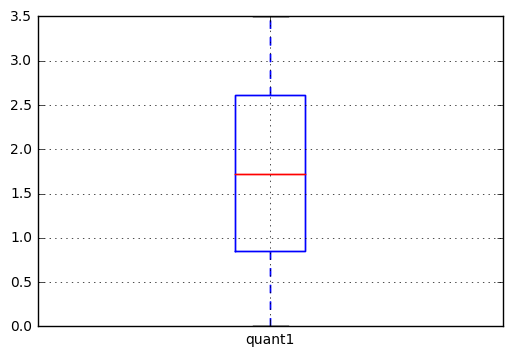

In [20]:
sf.boxplot(column="quant1")
plt.show()

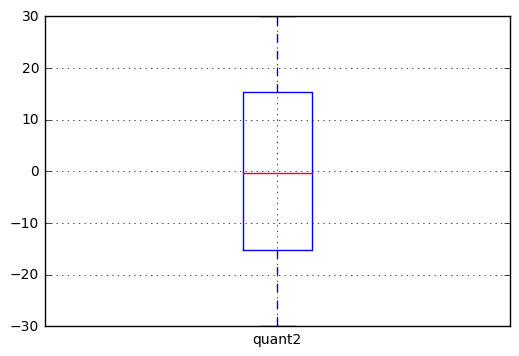

In [21]:
sf.boxplot(column="quant2")
plt.show()

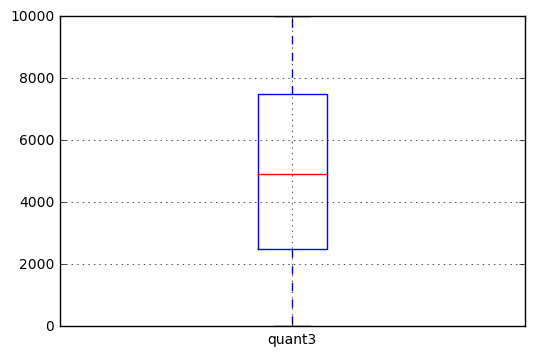

In [22]:
sf.boxplot(column="quant3")
plt.show()

In [23]:
sf.head()

,names,dates,latitude,longitude,categorical,quant1,quant2,quant3
0,b'Rawad',1.453009e+09,-19.988651,-41.435565,Category01,1.933239,6.052785,6105.123120
1,b'Eurma',1.471779e+09,-8.593256,27.742604,Category00,1.520733,-11.065076,143.902725
2,b'Taleia',1.473613e+09,-67.463164,-109.366796,Category04,1.863466,11.437340,2019.370225
3,b'Niley',1.481194e+09,-7.537010,-32.218540,Category03,0.745431,19.415543,3225.920647
4,b'Acey',1.454403e+09,-17.116866,2.949914,Category05,1.031100,17.714492,4976.099324


The date values in the dataframe look very strange.

In [24]:
sf["dates"].dtype

dtype('float64')

In [27]:
sf["dates"] = pd.to_datetime(sf["dates"])
sf["dates"].head()

0   1970-01-01 00:00:01.453008863
1   1970-01-01 00:00:01.471778578
2   1970-01-01 00:00:01.473613446
3   1970-01-01 00:00:01.481194251
4   1970-01-01 00:00:01.454402794
Name: dates, dtype: datetime64[ns]

In [28]:
sf["dates"].tail()

9995   1970-01-01 00:00:01.467967179
9996   1970-01-01 00:00:01.468900894
9997   1970-01-01 00:00:01.482666939
9998   1970-01-01 00:00:01.480074969
9999   1970-01-01 00:00:01.459758267
Name: dates, dtype: datetime64[ns]

So, I converted them somehow, but honestly I'm not sure if this is the correct representation now, as we are not going past the first day of 1970.

Next, let's try plotting latitude and longitude on a map.

In [33]:
lon_arr=[]  
lat_arr=[]  
for x in sf["longitude"][1:1000]: lon_arr.append(x)  
for x in sf["latitude"][1:1000]: lat_arr.append(x)

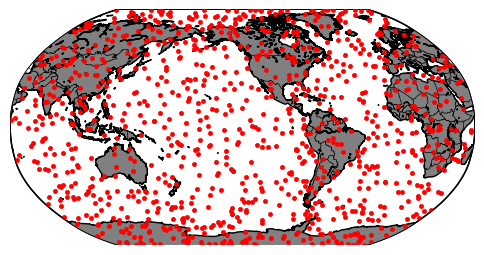

In [40]:
from mpl_toolkits.basemap import Basemap

map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,lat_0=0, lon_0=-130)
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'gray')
map.drawmapboundary()

x,y = map(lon_arr, lat_arr)

map.plot(x, y, 'r.', markersize=6)

plt.show()

In [41]:
sf.head()

,names,dates,latitude,longitude,categorical,quant1,quant2,quant3
0,b'Rawad',1970-01-01 00:00:01.453008863,-19.988651,-41.435565,Category01,1.933239,6.052785,6105.123120
1,b'Eurma',1970-01-01 00:00:01.471778578,-8.593256,27.742604,Category00,1.520733,-11.065076,143.902725
2,b'Taleia',1970-01-01 00:00:01.473613446,-67.463164,-109.366796,Category04,1.863466,11.437340,2019.370225
3,b'Niley',1970-01-01 00:00:01.481194251,-7.537010,-32.218540,Category03,0.745431,19.415543,3225.920647
4,b'Acey',1970-01-01 00:00:01.454402794,-17.116866,2.949914,Category05,1.031100,17.714492,4976.099324


Now, we try to show the properties of the quantitative columns for each category. As the quantitative columns look very disparate in value, it doesn't make much sense to plot them on the same graph. Instead, we display the properties of each quantitative column for all categories in one plot.

In [43]:
cat1data = sf.loc[sf['categorical'] == "Category01"]
cat2data = sf.loc[sf['categorical'] == "Category02"]
cat3data = sf.loc[sf['categorical'] == "Category03"]
cat4data = sf.loc[sf['categorical'] == "Category04"]
cat5data = sf.loc[sf['categorical'] == "Category05"]

In [44]:
cat1data.head()

,names,dates,latitude,longitude,categorical,quant1,quant2,quant3
0,b'Rawad',1970-01-01 00:00:01.453008863,-19.988651,-41.435565,Category01,1.933239,6.052785,6105.123120
10,b'Fedel',1970-01-01 00:00:01.477812041,-18.631134,74.340457,Category01,2.279198,14.212963,603.250919
11,b'Atha',1970-01-01 00:00:01.466150350,-15.882935,33.755634,Category01,2.313199,-9.623635,7044.723136
36,b'Deyla',1970-01-01 00:00:01.481619486,-77.171142,-2.007174,Category01,2.958818,-6.392447,5285.971992
37,b'Aniysa',1970-01-01 00:00:01.453739590,-44.443984,3.682890,Category01,0.790112,-8.476905,5635.925674


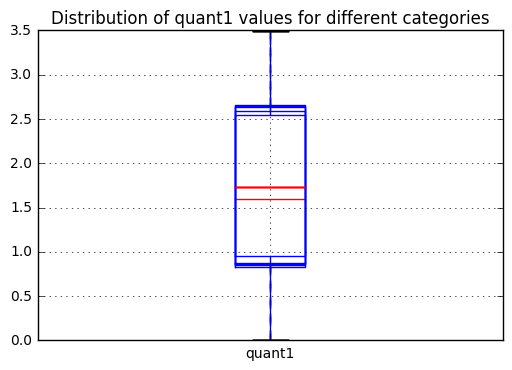

In [58]:
cat1data.boxplot(column="quant1")
cat2data.boxplot(column="quant1")
cat3data.boxplot(column="quant1")
cat4data.boxplot(column="quant1")
cat5data.boxplot(column="quant1")
plt.title("Distribution of quant1 values for different categories")
plt.show()

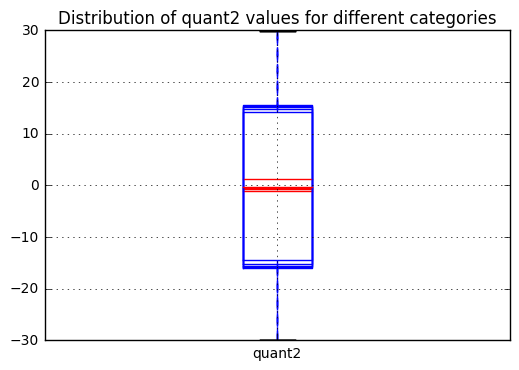

In [59]:
cat1data.boxplot(column="quant2")
cat2data.boxplot(column="quant2")
cat3data.boxplot(column="quant2")
cat4data.boxplot(column="quant2")
cat5data.boxplot(column="quant2")
plt.title("Distribution of quant2 values for different categories")
plt.show()

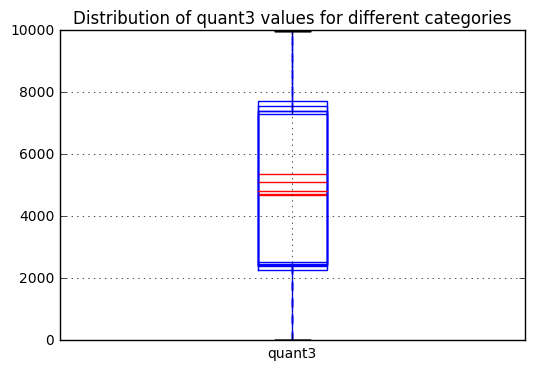

In [60]:
cat1data.boxplot(column="quant3")
cat2data.boxplot(column="quant3")
cat3data.boxplot(column="quant3")
cat4data.boxplot(column="quant3")
cat5data.boxplot(column="quant3")
plt.title("Distribution of quant3 values for different categories")
plt.show()